Context
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

Attribute Information
1) Age: age of the patient [years]

2) Sex: sex of the patient [M: Male, F: Female]

3) ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

4) RestingBP: resting blood pressure [mm Hg]

5) Cholesterol: serum cholesterol [mm/dl]

6) FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

7) RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

8) MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

9) ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

10) Oldpeak: oldpeak = ST [Numeric value measured in depression]

11) ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

12) HeartDisease: output class [1: heart disease, 0: Normal]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df=pd.read_csv("heart.csv")

In [3]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# Redefining DataFrame

In [7]:
numerical = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
categorical = ['Sex','ChestPainType','FastingBS','RestingECG','ST_Slope','ExerciseAngina','HeartDisease']
df = df[numerical + categorical]
df.shape

(918, 12)

# Analyzing Numerical Variable

In [8]:
# sns.set(style="whitegrid",palette="deep",font_scale=1.1,rc={"figure.figsize":[8,5]})

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RestingBP'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>,
        <AxesSubplot:title={'center':'MaxHR'}>],
       [<AxesSubplot:title={'center':'Oldpeak'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

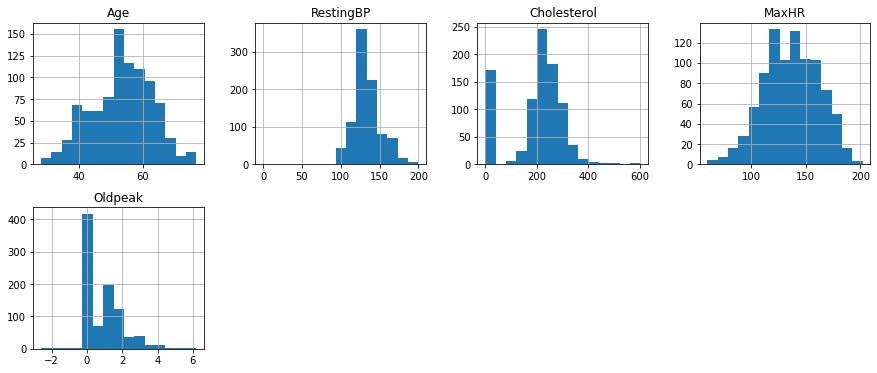

In [9]:
df[numerical].hist(bins=15,figsize=(15,6),layout=(2,4))

# Analyzing Categorical varaible

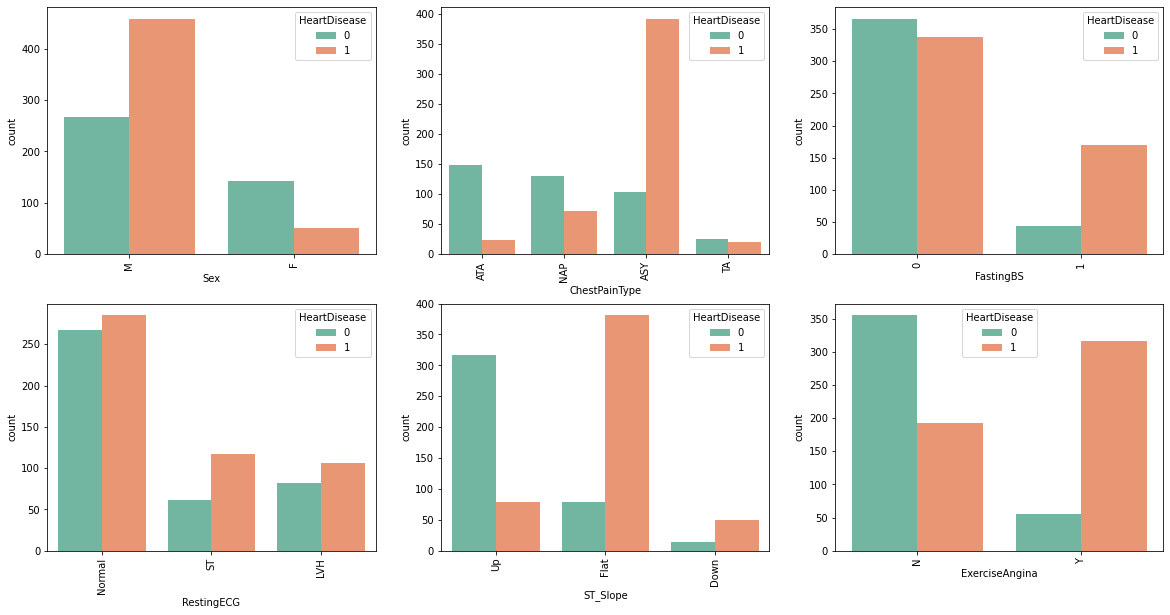

In [10]:
fig, ax = plt.subplots(2, 3, figsize=(20,10))
# ax.flatten()
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(x=df[variable], hue='HeartDisease', data=df,ax=subplot, palette='Set2')
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

After analysing categorical variable I conclude male suffer more from heart disease

# Analysing Relationships Between Numerical variable

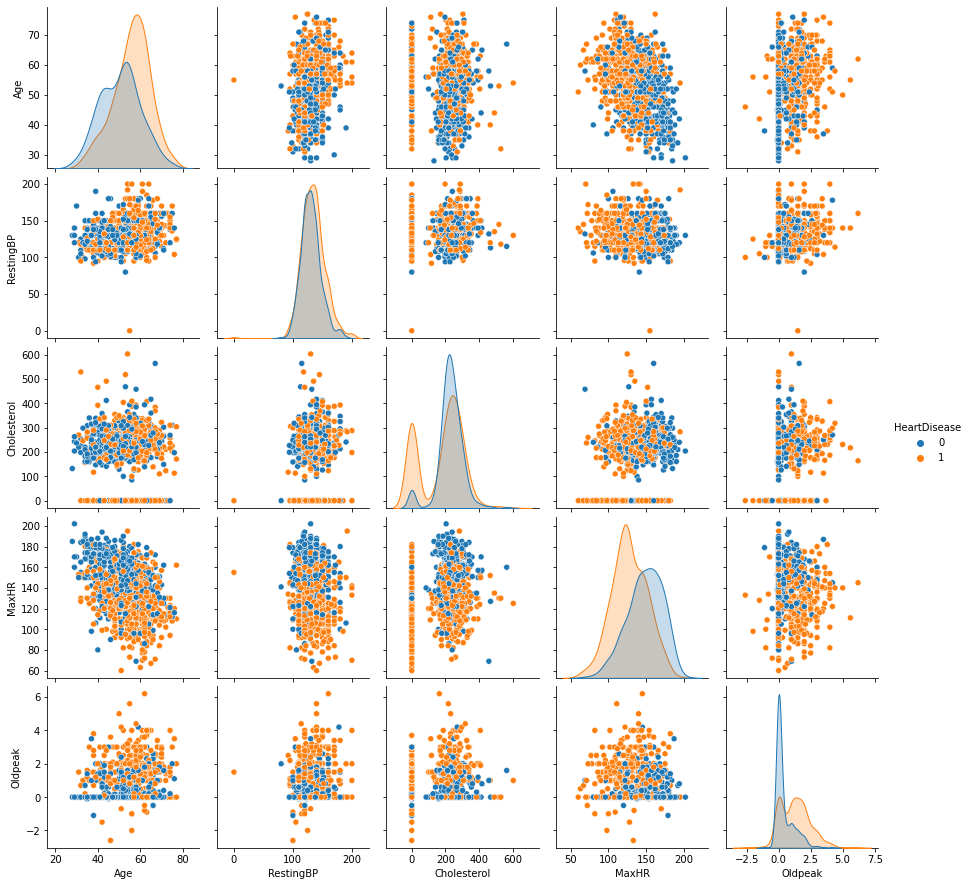

In [11]:
sns.pairplot(df[numerical+["HeartDisease"]],hue="HeartDisease")

From the above plot it is clear that:
* as the age increases chances of heart disease increases
*  as the MaxHR increases chances of heart disease increases

# Convert Categorical Feature to Numerical Values

# chestPainType:


In [12]:
ChestPainType_dummy=pd.get_dummies(df["ChestPainType"])
ChestPainType_dummy.rename(columns={'TA':'ChestPainType-TA','ATA':'ChestPainType-ATA','NAP':'ChestPainType-NAP','ASY':'ChestPainType-ASY'},inplace=True)
df=pd.concat([df,ChestPainType_dummy],axis=1)
df.drop("ChestPainType",axis=1,inplace=True)
df.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex,FastingBS,RestingECG,ST_Slope,ExerciseAngina,HeartDisease,ChestPainType-ASY,ChestPainType-ATA,ChestPainType-NAP,ChestPainType-TA
0,40,140,289,172,0.0,M,0,Normal,Up,N,0,0,1,0,0
1,49,160,180,156,1.0,F,0,Normal,Flat,N,1,0,0,1,0
2,37,130,283,98,0.0,M,0,ST,Up,N,0,0,1,0,0
3,48,138,214,108,1.5,F,0,Normal,Flat,Y,1,1,0,0,0
4,54,150,195,122,0.0,M,0,Normal,Up,N,0,0,0,1,0


# Sex

In [13]:
Gender=pd.get_dummies(df["Sex"])

In [14]:
Gender.rename(columns={'M':"Male","F":"Female"},inplace=True)

In [15]:
df=pd.concat([df,Gender],axis=1)
df.drop("Sex",axis=1,inplace=True)

In [16]:
df.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,FastingBS,RestingECG,ST_Slope,ExerciseAngina,HeartDisease,ChestPainType-ASY,ChestPainType-ATA,ChestPainType-NAP,ChestPainType-TA,Female,Male
0,40,140,289,172,0.0,0,Normal,Up,N,0,0,1,0,0,0,1
1,49,160,180,156,1.0,0,Normal,Flat,N,1,0,0,1,0,1,0
2,37,130,283,98,0.0,0,ST,Up,N,0,0,1,0,0,0,1
3,48,138,214,108,1.5,0,Normal,Flat,Y,1,1,0,0,0,1,0
4,54,150,195,122,0.0,0,Normal,Up,N,0,0,0,1,0,0,1


# RestingECG:


In [17]:
RestingECG_dummy=pd.get_dummies(df["RestingECG"])
RestingECG_dummy.rename(columns={'Normal':'RestingECG-Normal','ST':'RestingECG-ST','LVH':'RestingECG-LVH'}, inplace=True)
df.drop("RestingECG",axis=1,inplace=True)
df=pd.concat([df,RestingECG_dummy],axis=1)

# ExerciseAngina:

In [18]:
df["ExerciseAngina"].replace(to_replace=["N","Y"],value=[0,1],inplace=True)
df.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,FastingBS,ST_Slope,ExerciseAngina,HeartDisease,ChestPainType-ASY,ChestPainType-ATA,ChestPainType-NAP,ChestPainType-TA,Female,Male,RestingECG-LVH,RestingECG-Normal,RestingECG-ST
0,40,140,289,172,0.0,0,Up,0,0,0,1,0,0,0,1,0,1,0
1,49,160,180,156,1.0,0,Flat,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,98,0.0,0,Up,0,0,0,1,0,0,0,1,0,0,1
3,48,138,214,108,1.5,0,Flat,1,1,1,0,0,0,1,0,0,1,0
4,54,150,195,122,0.0,0,Up,0,0,0,0,1,0,0,1,0,1,0


# ST_Slope:

In [19]:
df["ST_Slope"].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [20]:
ST_Slope_dummy=pd.get_dummies(df["ST_Slope"])
ST_Slope_dummy.rename(columns={"Up":"ST_Slope-Up","Flat":"ST_Slope-Flat","Down":"ST_Slope-Down"},inplace=True)
df=pd.concat([df,ST_Slope_dummy],axis=1)
df.drop("ST_Slope",axis=1,inplace=True)

In [21]:
df.head().shape

(5, 20)

In [22]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

Confusion Matrix Function

In [23]:
# This function plot confusion matrix
def plot_confusion_matrix(y,y_predict):
    
    cm=confusion_matrix(y,y_predict)
    ax=plt.subplot()
    sns.heatmap(cm,ax=ax,annot=True)
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")
    ax.set_title("Confusion Matrix")
    ax.xaxis.set_ticklabels(['no heart disease','heart disease'])
    ax.yaxis.set_ticklabels(["no heart disease","heart disease"])
    
    

# Feature Selection

defining Dependent variable X:


In [24]:
X = df[['Age','Male',"Female",'RestingBP','Cholesterol','FastingBS','MaxHR','ExerciseAngina','Oldpeak','ChestPainType-ASY','ChestPainType-ATA','ChestPainType-NAP','ChestPainType-TA','RestingECG-LVH','RestingECG-Normal','RestingECG-ST','ST_Slope-Down','ST_Slope-Flat','ST_Slope-Up']]
X.head().shape

(5, 19)

Independent Variable Y:


In [25]:
Y=df["HeartDisease"].values
Y[0:5]

array([0, 1, 0, 1, 0], dtype=int64)

# Normalize Data

In [26]:
transform=preprocessing.StandardScaler()
X=transform.fit(X).transform(X)
X

array([[-1.4331398 ,  0.51595242, -0.51595242, ..., -0.27144836,
        -1.00218103,  1.15067399],
       [-0.47848359, -1.93816322,  1.93816322, ..., -0.27144836,
         0.99782372, -0.86905588],
       [-1.75135854,  0.51595242, -0.51595242, ..., -0.27144836,
        -1.00218103,  1.15067399],
       ...,
       [ 0.37009972,  0.51595242, -0.51595242, ..., -0.27144836,
         0.99782372, -0.86905588],
       [ 0.37009972, -1.93816322,  1.93816322, ..., -0.27144836,
         0.99782372, -0.86905588],
       [-1.64528563,  0.51595242, -0.51595242, ..., -0.27144836,
        -1.00218103,  1.15067399]])

# Model Development

Train/Test split:


In [27]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

# Logistic Regression

In [28]:
parameters={"C":[0.01,0.1,1],
           "penalty":["l2"],
           "solver":["lbfgs"]}
lr=LogisticRegression()

In [29]:
lr_cv=GridSearchCV(lr,parameters,cv=10)
lr_cv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [30]:
print("tuned hpyerparameters :(best parameters) ",lr_cv.best_params_)
print("accuracy :",lr_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8692336171788227


In [31]:
print("Accuracy is ",lr_cv.score(x_test,y_test))

Accuracy is  0.8478260869565217


Confusion Matrix:

In [32]:
y_predict=lr_cv.predict(x_test)

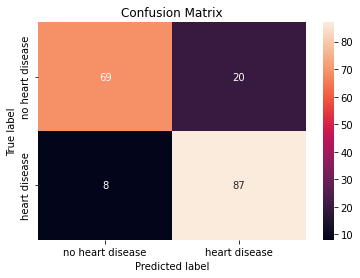

In [33]:
plot_confusion_matrix(y_test,y_predict)

# Support Vector Machine(SVM)

In [34]:
parameters={"kernel":('linear',"rbf","poly","sigmoid"),
           "C":np.logspace(-3,3,5),
           "gamma":np.logspace(-3,3,5)}
svm=SVC()

In [35]:
svm_cv=GridSearchCV(svm,parameters,cv=10)
svm_cv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')})

In [36]:
print("tuned hyperparameter:(best parameter)",svm_cv.best_params_)
print("accuarcy :",svm_cv.best_score_)

tuned hyperparameter:(best parameter) {'C': 1000.0, 'gamma': 0.001, 'kernel': 'rbf'}
accuarcy : 0.8746760459089226


In [37]:
print("Accuracy :",svm_cv.score(x_test,y_test))

Accuracy : 0.8315217391304348


Confusion Matrix:

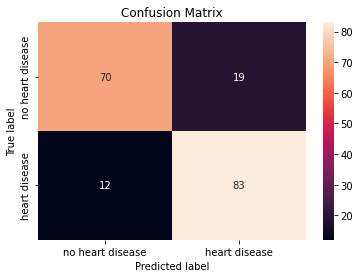

In [38]:
y_predict=svm_cv.predict(x_test)
plot_confusion_matrix(y_test,y_predict)

# Decision Tree

In [39]:
parameters={"criterion":['gini','entropy'],
           "splitter":["best","random"],
           "max_depth":[2*n for n in range(1,10)],
           "max_features":["auto","sqrt"],
           "min_samples_leaf":[1,2,4],
           "min_samples_split":[2,5,10]}
tree=DecisionTreeClassifier()

In [40]:
tree_cv=GridSearchCV(tree,parameters,cv=10)
tree_cv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [41]:
print("tuned hyperparameters :(best parameter) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hyperparameters :(best parameter)  {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'random'}
accuracy : 0.8637171417993337


In [42]:
print("Accuracy is",tree_cv.score(x_test,y_test))

Accuracy is 0.8097826086956522


Confusion Matrix:

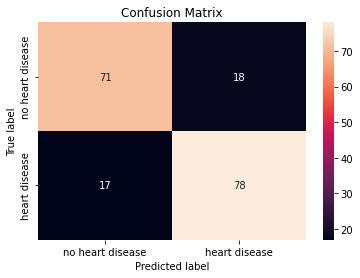

In [43]:
y_predict=tree_cv.predict(x_test)
plot_confusion_matrix(y_test,y_predict)

# K-Nearest Neighbors(KNN)

In [44]:
parameters={"n_neighbors":[1,2,3,4,5,6,7,8,9,10],
           "algorithm":["auto","ball_tree","kd_tree","brute"],
           "p":[1,2]}
KNN=KNeighborsClassifier()

In [45]:
KNN_cv=GridSearchCV(KNN,parameters,cv=10)
KNN_cv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [46]:
print("tuned hyperparameter :(best paarmeter)",KNN_cv.best_params_)
print("accuracy :",KNN_cv.best_score_)

tuned hyperparameter :(best paarmeter) {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8705479452054794


In [47]:
print("Accuracy is",KNN_cv.score(x_test,y_test))

Accuracy is 0.8478260869565217


Confusion Matrix:


In [48]:
y_predict=KNN_cv.predict(x_test)

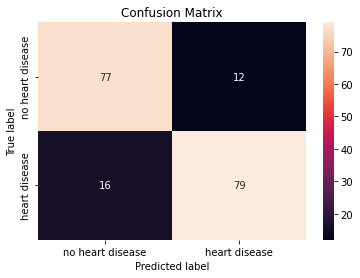

In [49]:
plot_confusion_matrix(y_test,y_predict)

# Finding Best Model and Accuracy

In [50]:
models = {'kneighbors': KNN_cv.best_score_,
         'DecisionTree': tree_cv.best_score_,
         'SVM': svm_cv.best_score_,
         'LogisticRegression': lr_cv.best_score_ }

best_model = max(models, key = models.get)
print('The best model is',best_model, 'with a score of',models[best_model])

The best model is SVM with a score of 0.8746760459089226
